## Importing necessary libraries and data

In [ ]:
#Import data manipulation libraries
import numpy as np
import pandas as pd

In [ ]:
#Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Import metrics to evaluate performance
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

#Import train, test, split
from sklearn.model_selection import train_test_split

In [ ]:
#import libraries to build decision tree, ensemble, and xgboost classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

#Import gridsearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
#Import warnings, ignore
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read in EasyVisacsv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ensemble/EasyVisa.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Data Overview

###Data Organizing & First Cleaning Sweep

In [ ]:
#Visualize head of dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Many of the columns are object datatypes and will need to be converted into categorical datatypes.

In [ ]:
#Check for missing values
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are no missing values

In [ ]:
#Check for duplicate values
data.duplicated().sum()

0

There are no duplicate values

In [ ]:
data.shape

(25480, 12)

The dataset has 25480 rows and 12 columns

In [ ]:
#Check the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


There are negative employees in the dataset, which will have to be dealt with.

In [ ]:
#identify rows with negative employee value counts
data.loc[data['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
#convert negative employee values into positive employee values
data['no_of_employees'] = abs(data['no_of_employees'])

In [ ]:
#Check that the negative values have been changed
data.loc[data['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


The negative employee number values have been changed

In [ ]:
#Check for all unique values
data.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


Case_id will be dropped as they they are all unique values

In [ ]:
#drop case_id column from dataset
data.drop('case_id', axis=1, inplace=True)

In [ ]:
#Make sure case_id is dropped from dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [ ]:
#Convert object datatypes in data set into categorical valueas
for key in data.columns:
    if data[key].dtype == 'object':
        data[key] = pd.Categorical(data[key])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Functions for Visualizations

In [ ]:
#Adding useful visualization functions

#Histogram-Barplot
#function for histogram/boxplot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#Creating a function for function for labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Create function for stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
#Create function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

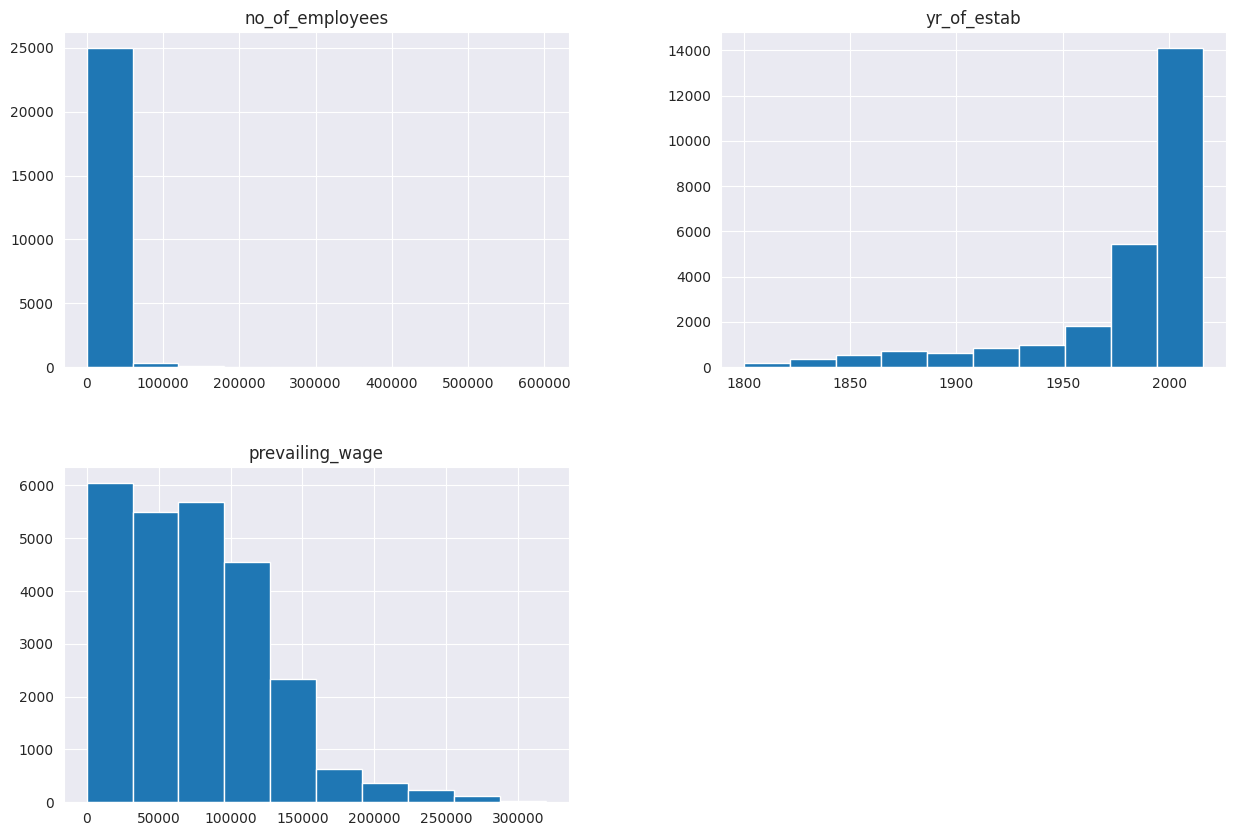

In [ ]:
#Check the distributions of int/float values
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

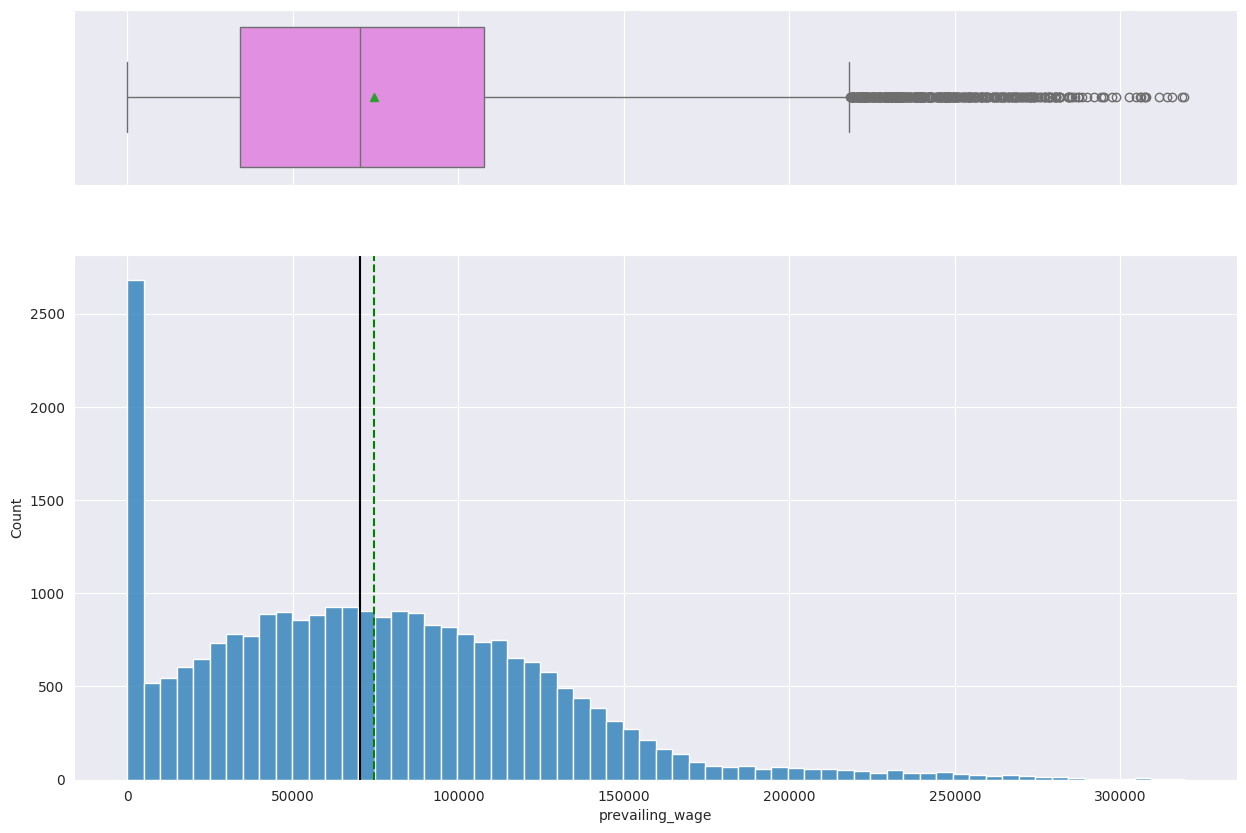

In [ ]:
#Visualize a histogram boxplot for prevailing wage
histogram_boxplot(data, 'prevailing_wage')

Except for the very first bucket in the histogram, the data is right skewed and almost normal. The first bucket, however, is at least twice as high as the peak on the curve. Since prevailing wage comes in four different units, hourly wages might be contributing to this.

#### Labeled Barplots

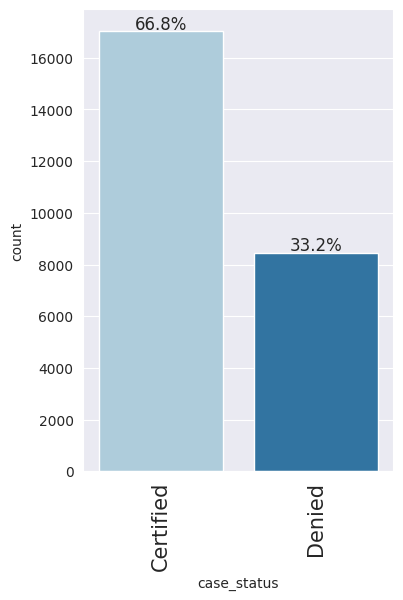

In [ ]:
#Check the ratio of certified vs. denied case status
labeled_barplot(data, 'case_status', perc=True)

About one-third of visa casees are denied. This can be used when building a balanced model.

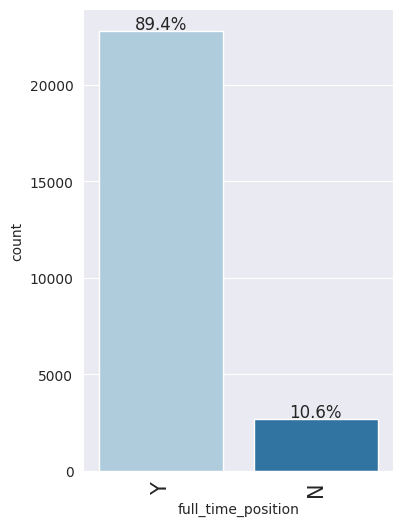

In [ ]:
#Check the ratio of full time vs part time positions
labeled_barplot(data, 'full_time_position', perc=True)

Most positions are full time

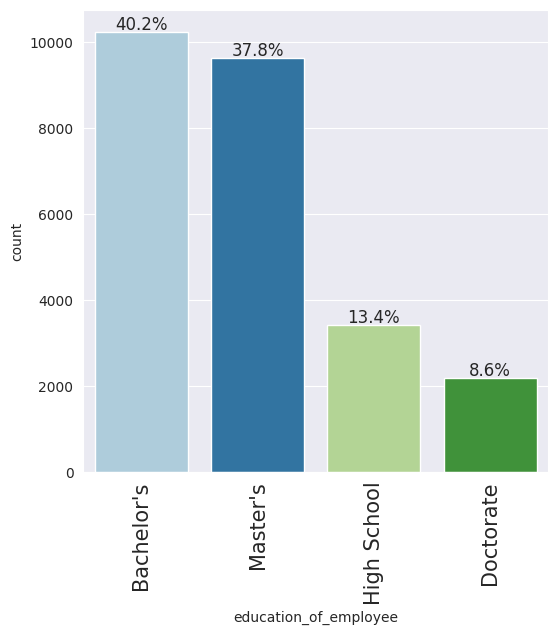

In [ ]:
#Check the breakdown of education for applicants
labeled_barplot(data, 'education_of_employee', perc=True)

Bachelor's and Master's degree applicants account for about 80% of the total cases.

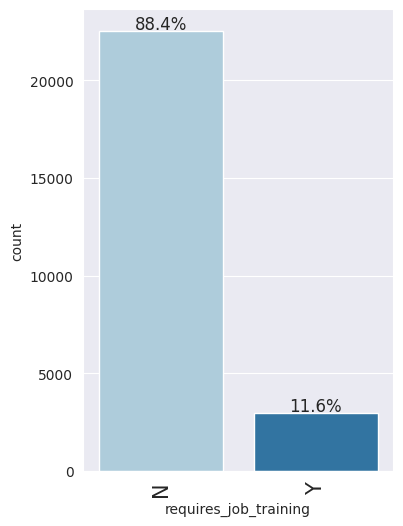

In [ ]:
#Check the ratio for job training required
labeled_barplot(data, 'requires_job_training', perc=True)

Most of the jobs do not require job training

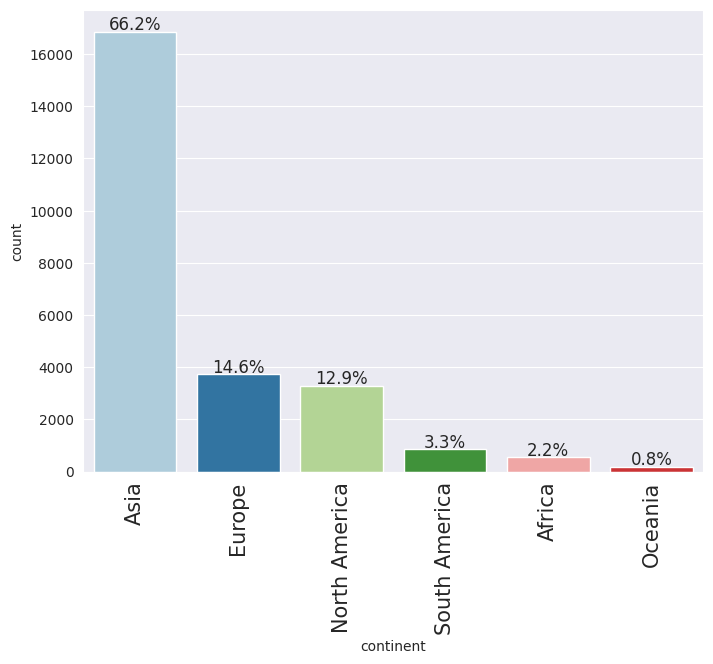

In [ ]:
#Check the breakdown of applicants' origin: continents
labeled_barplot(data, 'continent', perc=True)

Asia accounts for two-thirds of all cases with the remaining five taking the other third.

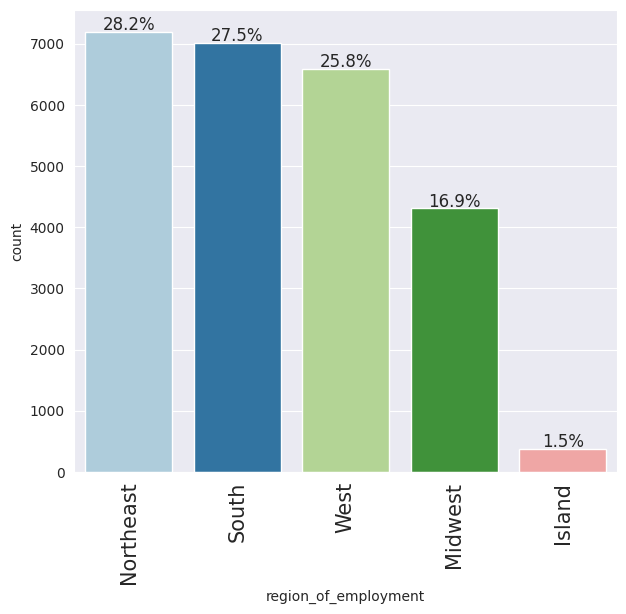

In [ ]:
#Check the breakdown of jobs by region
labeled_barplot(data, 'region_of_employment', perc=True)

Island regions have notably less employment than land-based

### Bivariate Analysis

#### Employee Description and Case Status: Stacked Barplots

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


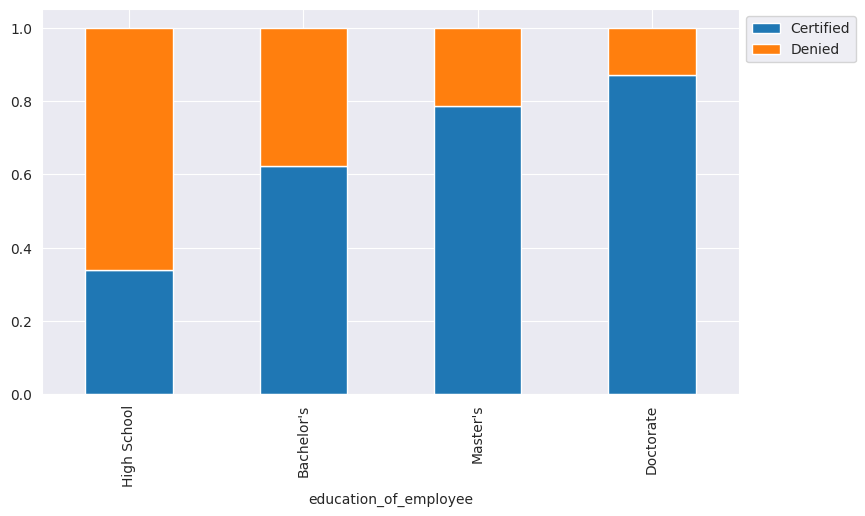

In [ ]:
#Case_status by education
stacked_barplot(data, 'education_of_employee', 'case_status')

There appears to be a correlation between education and certification. More education pairs with higher certification percentage.

More than 50% of High School educated candidates were denied

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


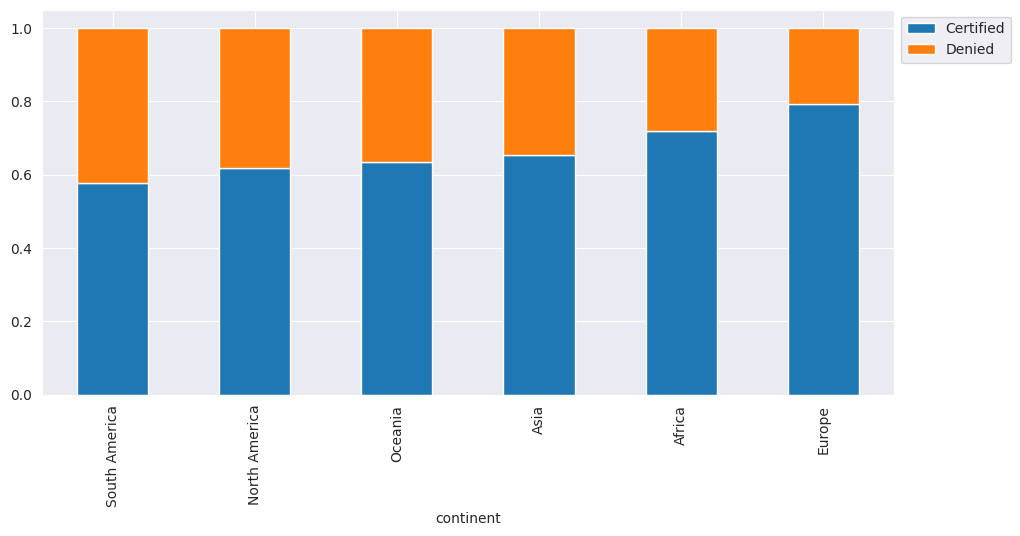

In [ ]:
#Case Status by continent
stacked_barplot(data, 'continent', 'case_status')

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


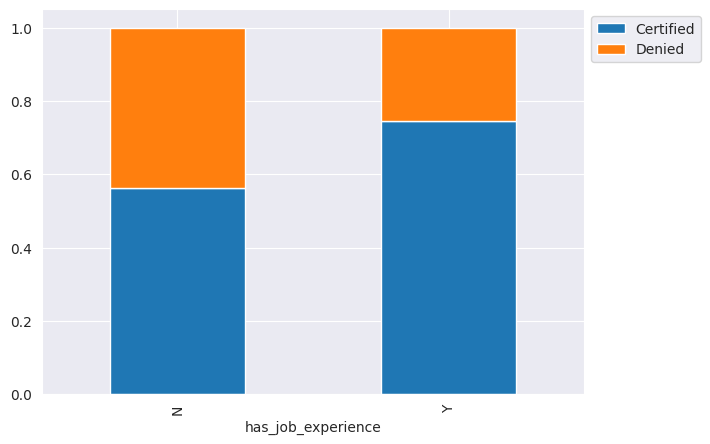

In [ ]:
#Case Status vs. job experience
stacked_barplot(data, 'has_job_experience', 'case_status')

Job experience is positively correlated with visa certification

#### Job characterisitics vs. case status


case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


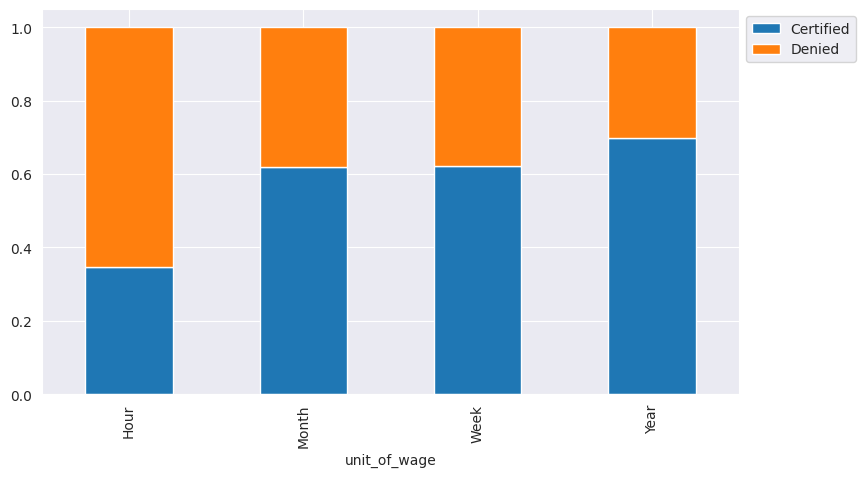

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

Hourly wages correlate to higher rates of visa denial— about a 40:60 deny:certify split

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


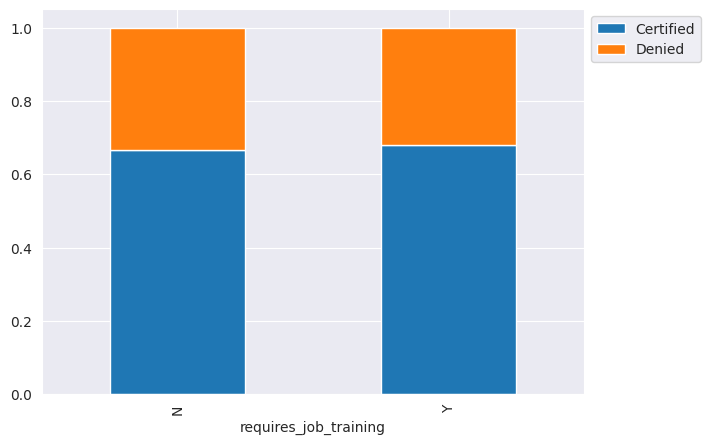

In [ ]:
#Case status approval by job training requirements
stacked_barplot(data, 'requires_job_training', 'case_status')

There appears to be little correlation between job training and visa status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


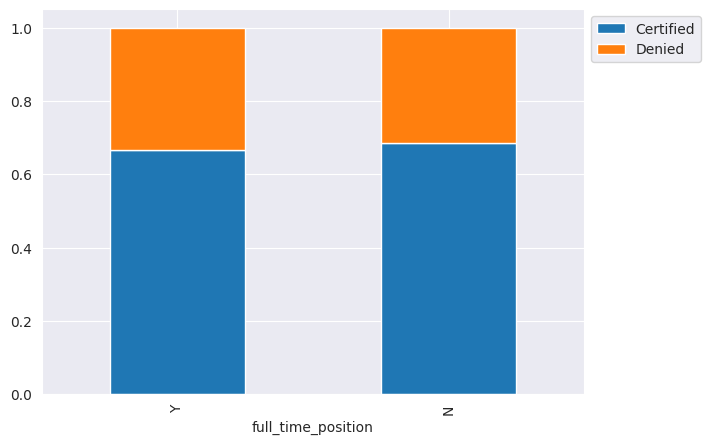

In [ ]:
#Case status by full time or part time
stacked_barplot(data, 'full_time_position', 'case_status')

Position time-type appears to have no correlation with case status

In [ ]:
#Check case status against prevailing wages, using bins
df = data.copy()
df['prevailing_wage_bins'] = pd.cut(df['prevailing_wage'], bins=10)

case_status               Certified  Denied    All
prevailing_wage_bins                              
All                           17018    8462  25480
(-317.071, 31922.95]           3564    2474   6038
(63843.763, 95764.577]         3958    1723   5681
(31922.95, 63843.763]          3822    1682   5504
(95764.577, 127685.39]         3093    1458   4551
(127685.39, 159606.203]        1620     714   2334
(159606.203, 191527.017]        419     205    624
(191527.017, 223447.83]         254     119    373
(223447.83, 255368.643]         186      54    240
(255368.643, 287289.457]         88      26    114
(287289.457, 319210.27]          14       7     21
------------------------------------------------------------------------------------------------------------------------


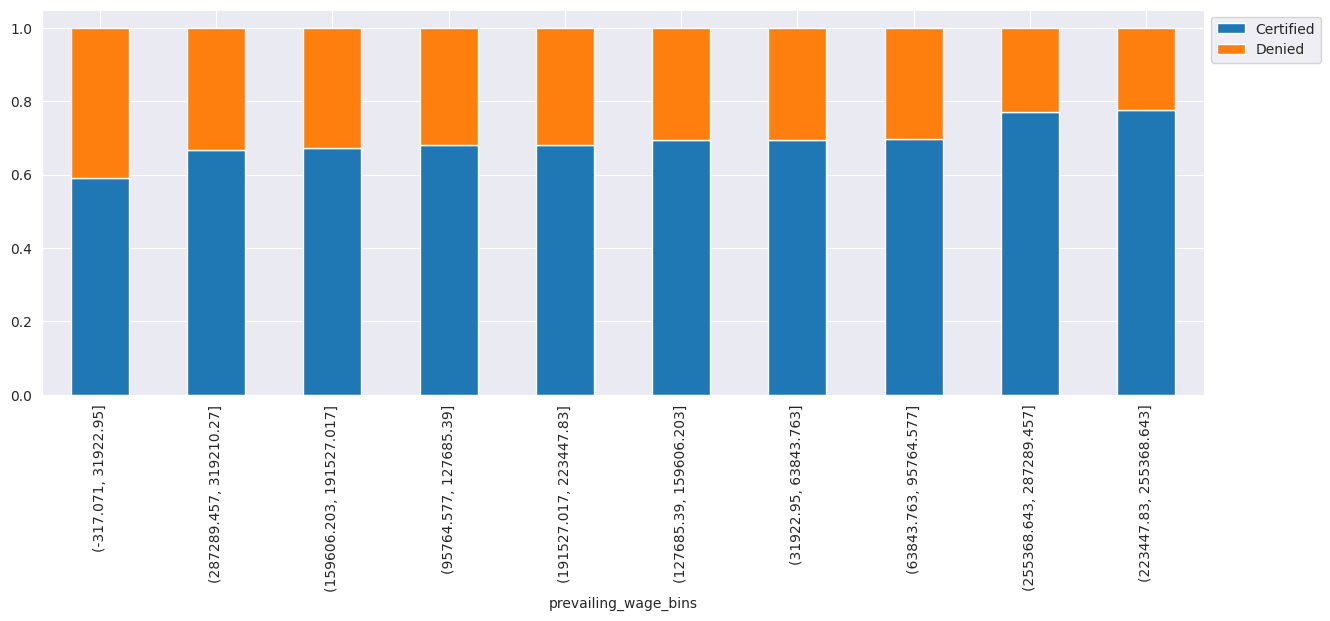

In [ ]:
#check case status against prevailing wage and chart in ascending order
stacked_barplot(df, 'prevailing_wage_bins', 'case_status')

Notably, the lowest prevailing wages (up to $31,922) are denied more than any other prevailing wage range: about 40% of the time.

The best rate for certification is between 223,447 dollars and 287,289 dollars



#### Independent variable comparison

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


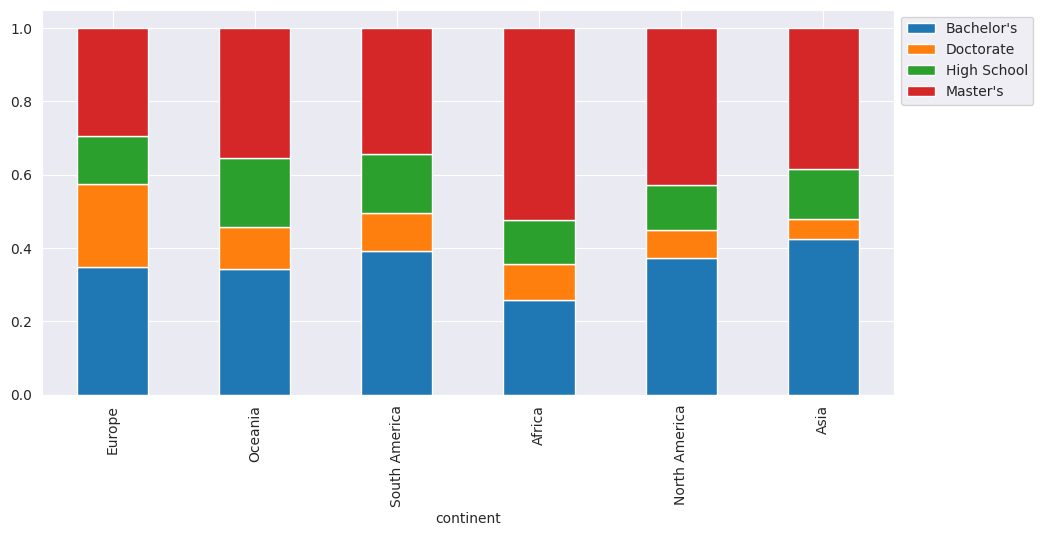

In [ ]:
#Check education by continent for applicants
stacked_barplot(data, 'continent', 'education_of_employee')

Europe has a notably high amount of Doctorate applicants. Africa has a notably low amount of Bachelor applicants and high amount of Master's applicants.

region_of_employment  Island  Midwest  Northeast  South  West    All
unit_of_wage                                                        
All                      375     4307       7195   7017  6586  25480
Year                     354     4116       6209   6225  6058  22962
Hour                      18      146        865    696   432   2157
Week                       3       32         92     68    77    272
Month                      0       13         29     28    19     89
------------------------------------------------------------------------------------------------------------------------


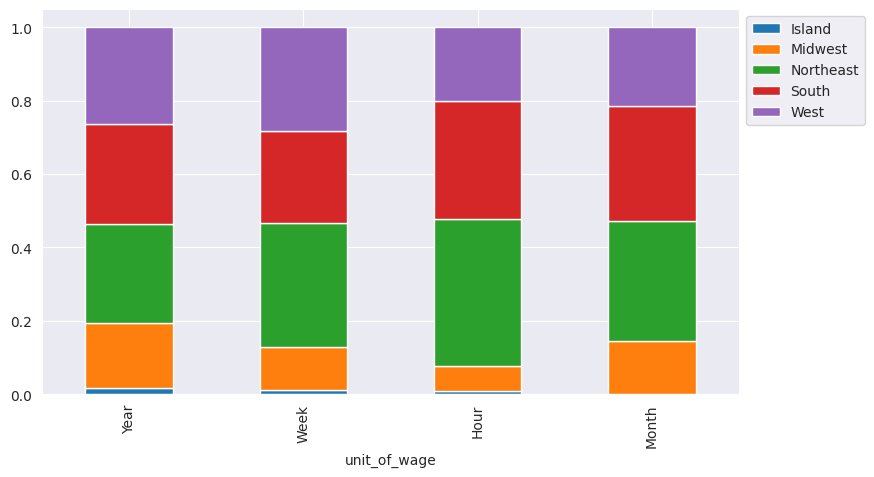

In [ ]:
#visualize requires job training and education
stacked_barplot(data, 'unit_of_wage', 'region_of_employment')

Hourly wages have the largest discrepency between regions. The Northeast has the highest rate of hourly wages.

prevailing_wage_bins  (-317.071, 31922.95]  (31922.95, 63843.763]  \
region_of_employment                                                
All                                   6038                   5504   
Midwest                                599                    768   
West                                  1705                   1562   
South                                 1667                   1497   
Island                                  52                     61   
Northeast                             2015                   1616   

prevailing_wage_bins  (63843.763, 95764.577]  (95764.577, 127685.39]  \
region_of_employment                                                   
All                                     5681                    4551   
Midwest                                  995                     978   
West                                    1474                    1069   
South                                   1578                    1267   
Island         

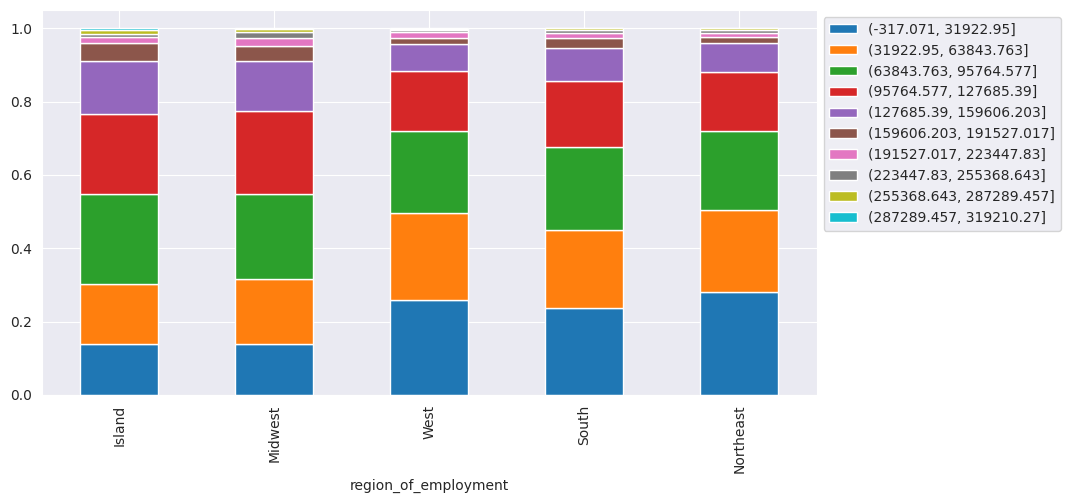

In [ ]:
#Check prevailing wage bins by region
stacked_barplot(df, 'region_of_employment', 'prevailing_wage_bins')

Lower prevailing wages were highest in the Northeast. This is also where Hourly Wage Unit was the highest.

#### Observations
1. Education and certification appear to be positively correlated. More education had more certification:denied ratios. Those with higher education may want to travel abroad for a well-paid job.

2. The variation from lowest certified rate (South America, 60%) to highest certified rate (Europe, 80%) is about 20%. However, South America accounts for a very small sample in total visa applications. Asia has the overwhelming majority of total approvals.

3. Prior work experience has a 20% lead for certification on no prior work experience. Prior work experience ~ 80% and no prior work experience ~ 60%.

4. For visa status, yearly wage unit has the highest certification rate (about 70%) and hourly has the lowest (about 35%). The difference between the two is about 35%. Hourly wage is the only unit that has less than a 50% certification rate.

5. The lowest prevailing wages (up to $31,922) are denied more than any other prevailing wage range: about 40% of the time. However, the highest range follows closely behind that at about 35% denied. So, the ends of the spectrum have the lowest certification rate.

The sweet spot for certification is between 223,447 dollars and 287,289 dollars, which has about an 80% certified status rate.

6. The wage values are questionable. The hourly prevailing wages are very high when converted into a yearly unit. Some of the hourly wages are in a reasonable range. We will keep the values as there isn't enough information to suggest we shouldn't.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Assigning ordinal and nomial values to categorical data

In [ ]:
#Check the unique values in the education column—These will be assigned ordinal values
print(data.education_of_employee.value_counts())

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64


In [ ]:
#Encode ordinal and nominal values from category using one-hot encoding and dummy replacement
#Assign nominal keys to variable
nominal = ['continent', 'region_of_employment', 'unit_of_wage', 'requires_job_training', 'full_time_position',]
#Assign ordinal keys to vairable
ordinal = {"education_of_employee": {"High School": 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4}, "has_job_experience": {"Y": 1, "N": 0}, "case_status": {"Certified": 1, "Denied": 0}}

In [ ]:
#get dummy variables for nominal keys
data = pd.get_dummies(data, columns=nominal)

In [ ]:
#Check the new shape of the dataset
data.shape

(25480, 25)

There are now 25 columns

In [ ]:
#Visualize the first 5 rows of the updated dataset
data.head()

,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,...,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,requires_job_training_N,requires_job_training_Y,full_time_position_N,full_time_position_Y
0,High School,N,14513,2007,592.2029,Denied,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
1,Master's,Y,2412,2002,83425.6500,Certified,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True
2,Bachelor's,N,44444,2008,122996.8600,Denied,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
3,Bachelor's,N,98,1897,83434.0300,Denied,False,True,False,False,...,False,True,False,False,False,True,True,False,False,True
4,Master's,Y,1082,2005,149907.3900,Certified,True,False,False,False,...,True,False,False,False,False,True,True,False,False,True


In [ ]:
#Check the datatypes of the updated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   education_of_employee           25480 non-null  category
 1   has_job_experience              25480 non-null  category
 2   no_of_employees                 25480 non-null  int64   
 3   yr_of_estab                     25480 non-null  int64   
 4   prevailing_wage                 25480 non-null  float64 
 5   case_status                     25480 non-null  category
 6   continent_Africa                25480 non-null  bool    
 7   continent_Asia                  25480 non-null  bool    
 8   continent_Europe                25480 non-null  bool    
 9   continent_North America         25480 non-null  bool    
 10  continent_Oceania               25480 non-null  bool    
 11  continent_South America         25480 non-null  bool    
 12  region_of_employme

The one-hot-encoded values were converted to boolean datatypes. They will need to be converted to integers

In [ ]:
# Identify boolean columns
bool_cols = data.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers
data[bool_cols] = data[bool_cols].astype(int)

In [ ]:
#Confirm conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   education_of_employee           25480 non-null  category
 1   has_job_experience              25480 non-null  category
 2   no_of_employees                 25480 non-null  int64   
 3   yr_of_estab                     25480 non-null  int64   
 4   prevailing_wage                 25480 non-null  float64 
 5   case_status                     25480 non-null  category
 6   continent_Africa                25480 non-null  int64   
 7   continent_Asia                  25480 non-null  int64   
 8   continent_Europe                25480 non-null  int64   
 9   continent_North America         25480 non-null  int64   
 10  continent_Oceania               25480 non-null  int64   
 11  continent_South America         25480 non-null  int64   
 12  region_of_employme

In [ ]:
#Replace ordinal values to remaining category datatypes
data=data.replace(ordinal)

In [ ]:
#Check dataset with new inputs
data.head()

,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,...,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,requires_job_training_N,requires_job_training_Y,full_time_position_N,full_time_position_Y
0,1,0,14513,2007,592.2029,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1
1,3,1,2412,2002,83425.6500,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2,0,44444,2008,122996.8600,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
3,2,0,98,1897,83434.0300,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
4,3,1,1082,2005,149907.3900,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   education_of_employee           25480 non-null  category
 1   has_job_experience              25480 non-null  category
 2   no_of_employees                 25480 non-null  int64   
 3   yr_of_estab                     25480 non-null  int64   
 4   prevailing_wage                 25480 non-null  float64 
 5   case_status                     25480 non-null  category
 6   continent_Africa                25480 non-null  int64   
 7   continent_Asia                  25480 non-null  int64   
 8   continent_Europe                25480 non-null  int64   
 9   continent_North America         25480 non-null  int64   
 10  continent_Oceania               25480 non-null  int64   
 11  continent_South America         25480 non-null  int64   
 12  region_of_employme

### Outlier Treatment


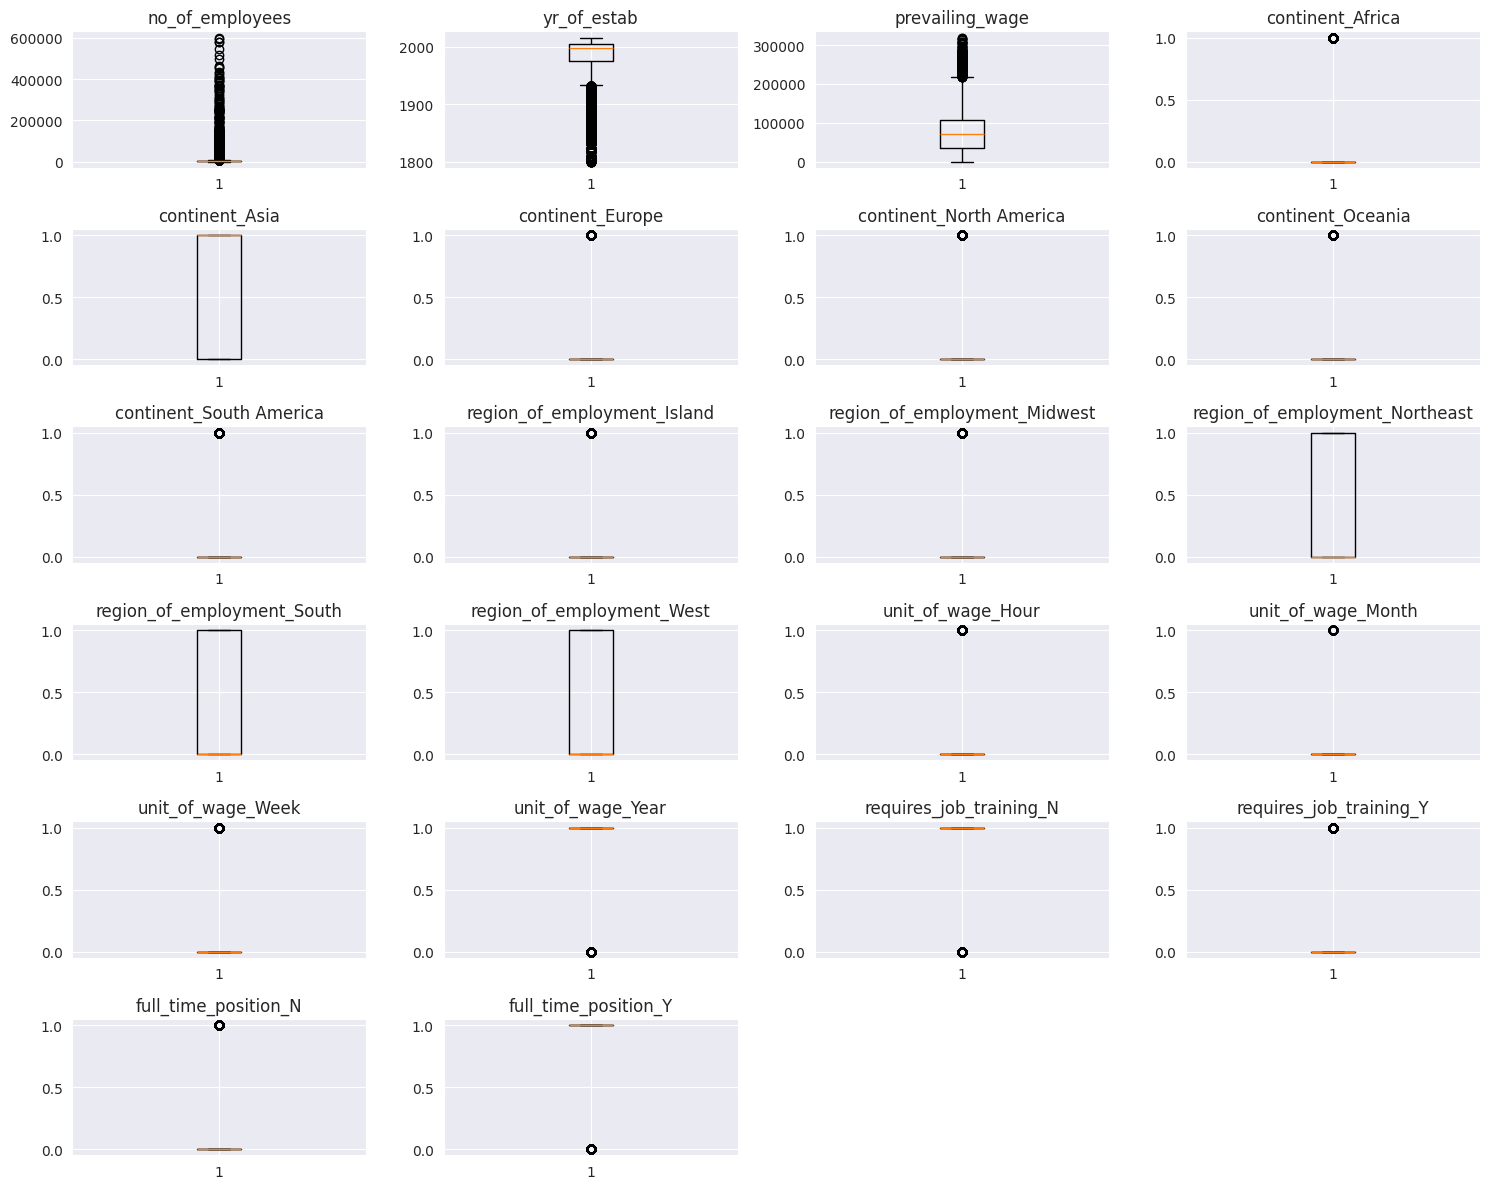

In [ ]:
#Visualize for outliers
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers will not be removed as the appear to be real values

### Exploratory Data Analysis After Processing

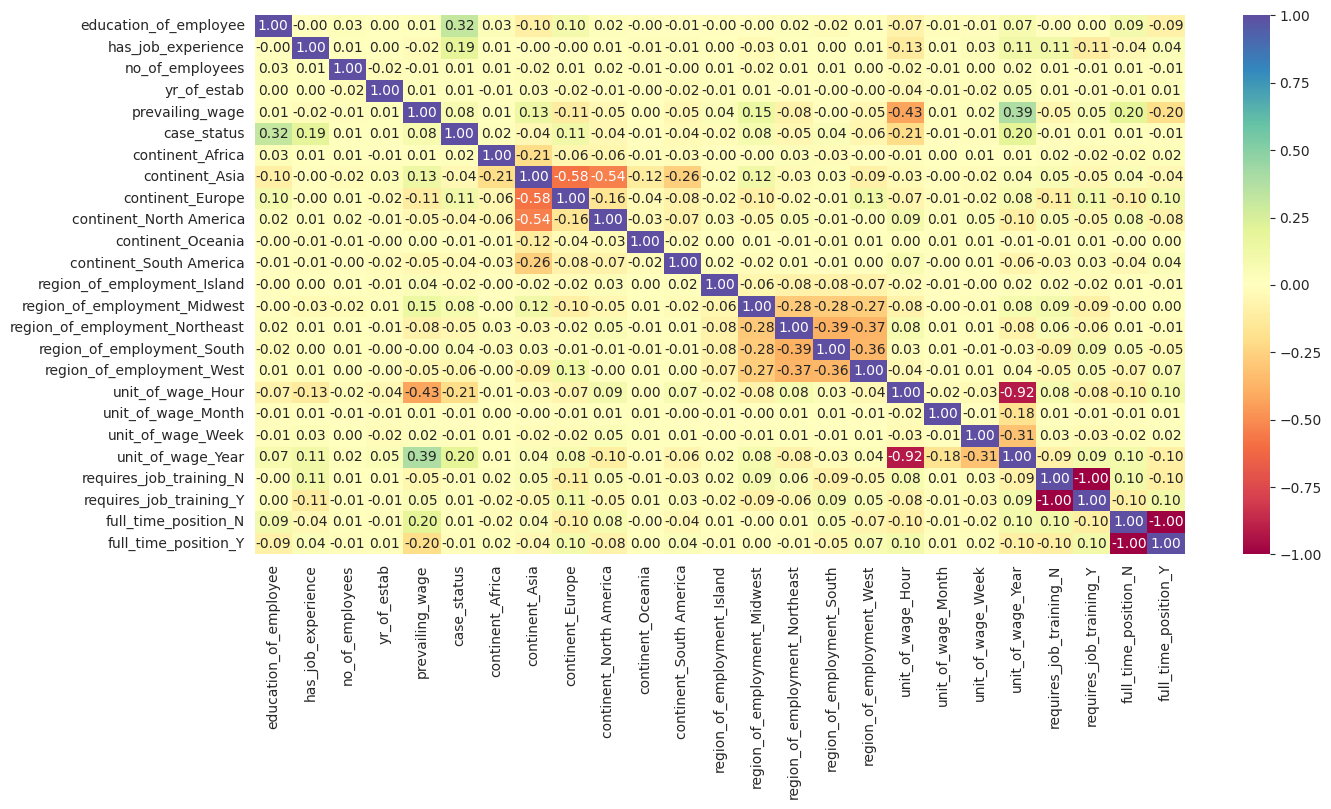

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
continent_Africa,25480.0,0.021625,0.145458,0.0000,0.00,0.00,0.0000,1.00
continent_Asia,25480.0,0.661735,0.473129,0.0000,0.00,1.00,1.0000,1.00
continent_Europe,25480.0,0.146468,0.353582,0.0000,0.00,0.00,0.0000,1.00
continent_North America,25480.0,0.129199,0.335427,0.0000,0.00,0.00,0.0000,1.00
continent_Oceania,25480.0,0.007535,0.086480,0.0000,0.00,0.00,0.0000,1.00
continent_South America,25480.0,0.033438,0.179781,0.0000,0.00,0.00,0.0000,1.00
region_of_employment_Island,25480.0,0.014717,0.120422,0.0000,0.00,0.00,0.0000,1.00


### Prepare data for split

In [ ]:
#Create train and test data by dropping the independent variable, Case_status
X = data.drop('case_status', axis=1)
y = data['case_status']

In [ ]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #stratify because of imbalance in target variable

In [ ]:
#Print X_train and X_test data shapes
print(X_train.shape)
print(X_test.shape)

(19110, 24)
(6370, 24)


In [ ]:
#Check proportion of target values
y.value_counts(1)

,proportion
case_status,
1,0.667896
0,0.332104


In [ ]:
#Check proportion of target test values
y_test.value_counts(1)

,proportion
case_status,
1,0.678179
0,0.321821


Proportions will be used in model weights

## Building bagging and boosting models

### Priority Evaluation Metric for Visa Approval

Weigh the possible wrong predictions:

If a visa is approved when it should have been denied, the model has returned a false positive and an applicant will get a visa certification who would normally not get one.

If a visa is denied when it should have been approved, the model has returned a false negative and an applicant will be denied a visa who would normally get one.

An unqualified candidate or the loss of a qualified candidate are balanced problems. Both options provide about equal loss.

If we are looking to minimize False Positives AND False Negatives, **we will be using the F1 score as our performance metric.**

### Functions for Model Performance and Metrics

In [ ]:
#Define the a function for performance metrics of each model

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#define the Function for a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Bagging

### Decision Tree

In [ ]:
#Assign a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=1)
#Fit the model to the data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#check the performance metrics of the decision tree
DT_Train = (model_performance_classification_sklearn(dt_classifier, X_train, y_train))
DT_Test = (model_performance_classification_sklearn(dt_classifier, X_test, y_test))
print(DT_Train)
print(DT_Test)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy   Recall  Precision       F1
0  0.664364  0.74375   0.757069  0.75035


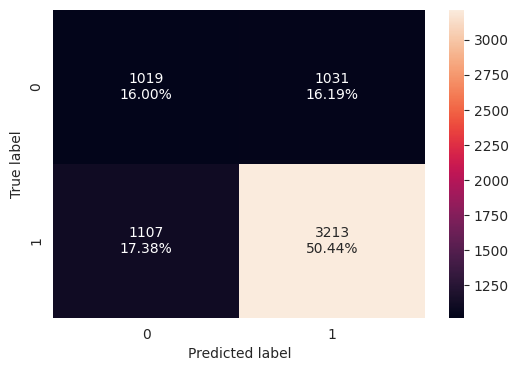

In [ ]:
#Check the confusion matrix for the DT
confusion_matrix_sklearn(dt_classifier, X_test, y_test)

The model is overfitting the training data.

#### Tune the Decision tree hyperparameters

In [ ]:
#Assign tuned model
dt_classifier_tuned = DecisionTreeClassifier(random_state=1)

#Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': np.arange(2,10),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

#Assign f1 performance metric to acc_score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(dt_classifier_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj.fit(X_train, y_train)

#Set clf to best parameters
dt_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_classifier_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

In [ ]:
#Check the performance metrics of the tuned decision tree
Tuned_DT_Train = (model_performance_classification_sklearn(dt_classifier_tuned, X_train, y_train))
Tuned_DT_Test = (model_performance_classification_sklearn(dt_classifier_tuned, X_test, y_test))
print(Tuned_DT_Train)
print(Tuned_DT_Test)

   Accuracy    Recall  Precision        F1
0  0.749451  0.873917   0.776883  0.822548
   Accuracy    Recall  Precision        F1
0  0.749608  0.868981   0.784863  0.824783


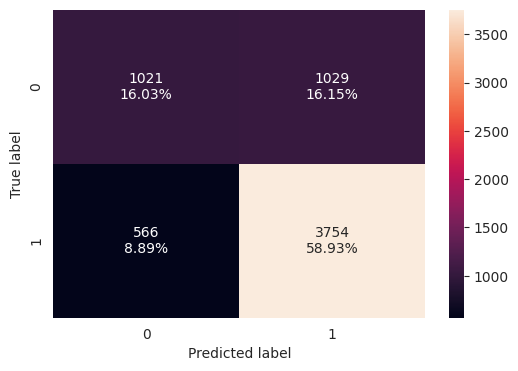

In [ ]:
#Check the confusion matrix for the tuned decision tree
confusion_matrix_sklearn(dt_classifier_tuned, X_test, y_test)

The model isn't overfitting the data anymore and the performance metrics increased.

**Visualize the Tree**

In [ ]:
#import tree plot
from sklearn import tree

In [ ]:
#Assign feature list to variable
feature_names = list(X.columns)
print(feature_names)

['education_of_employee', 'has_job_experience', 'no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'region_of_employment_Island', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West', 'unit_of_wage_Hour', 'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year', 'requires_job_training_N', 'requires_job_training_Y', 'full_time_position_N', 'full_time_position_Y']


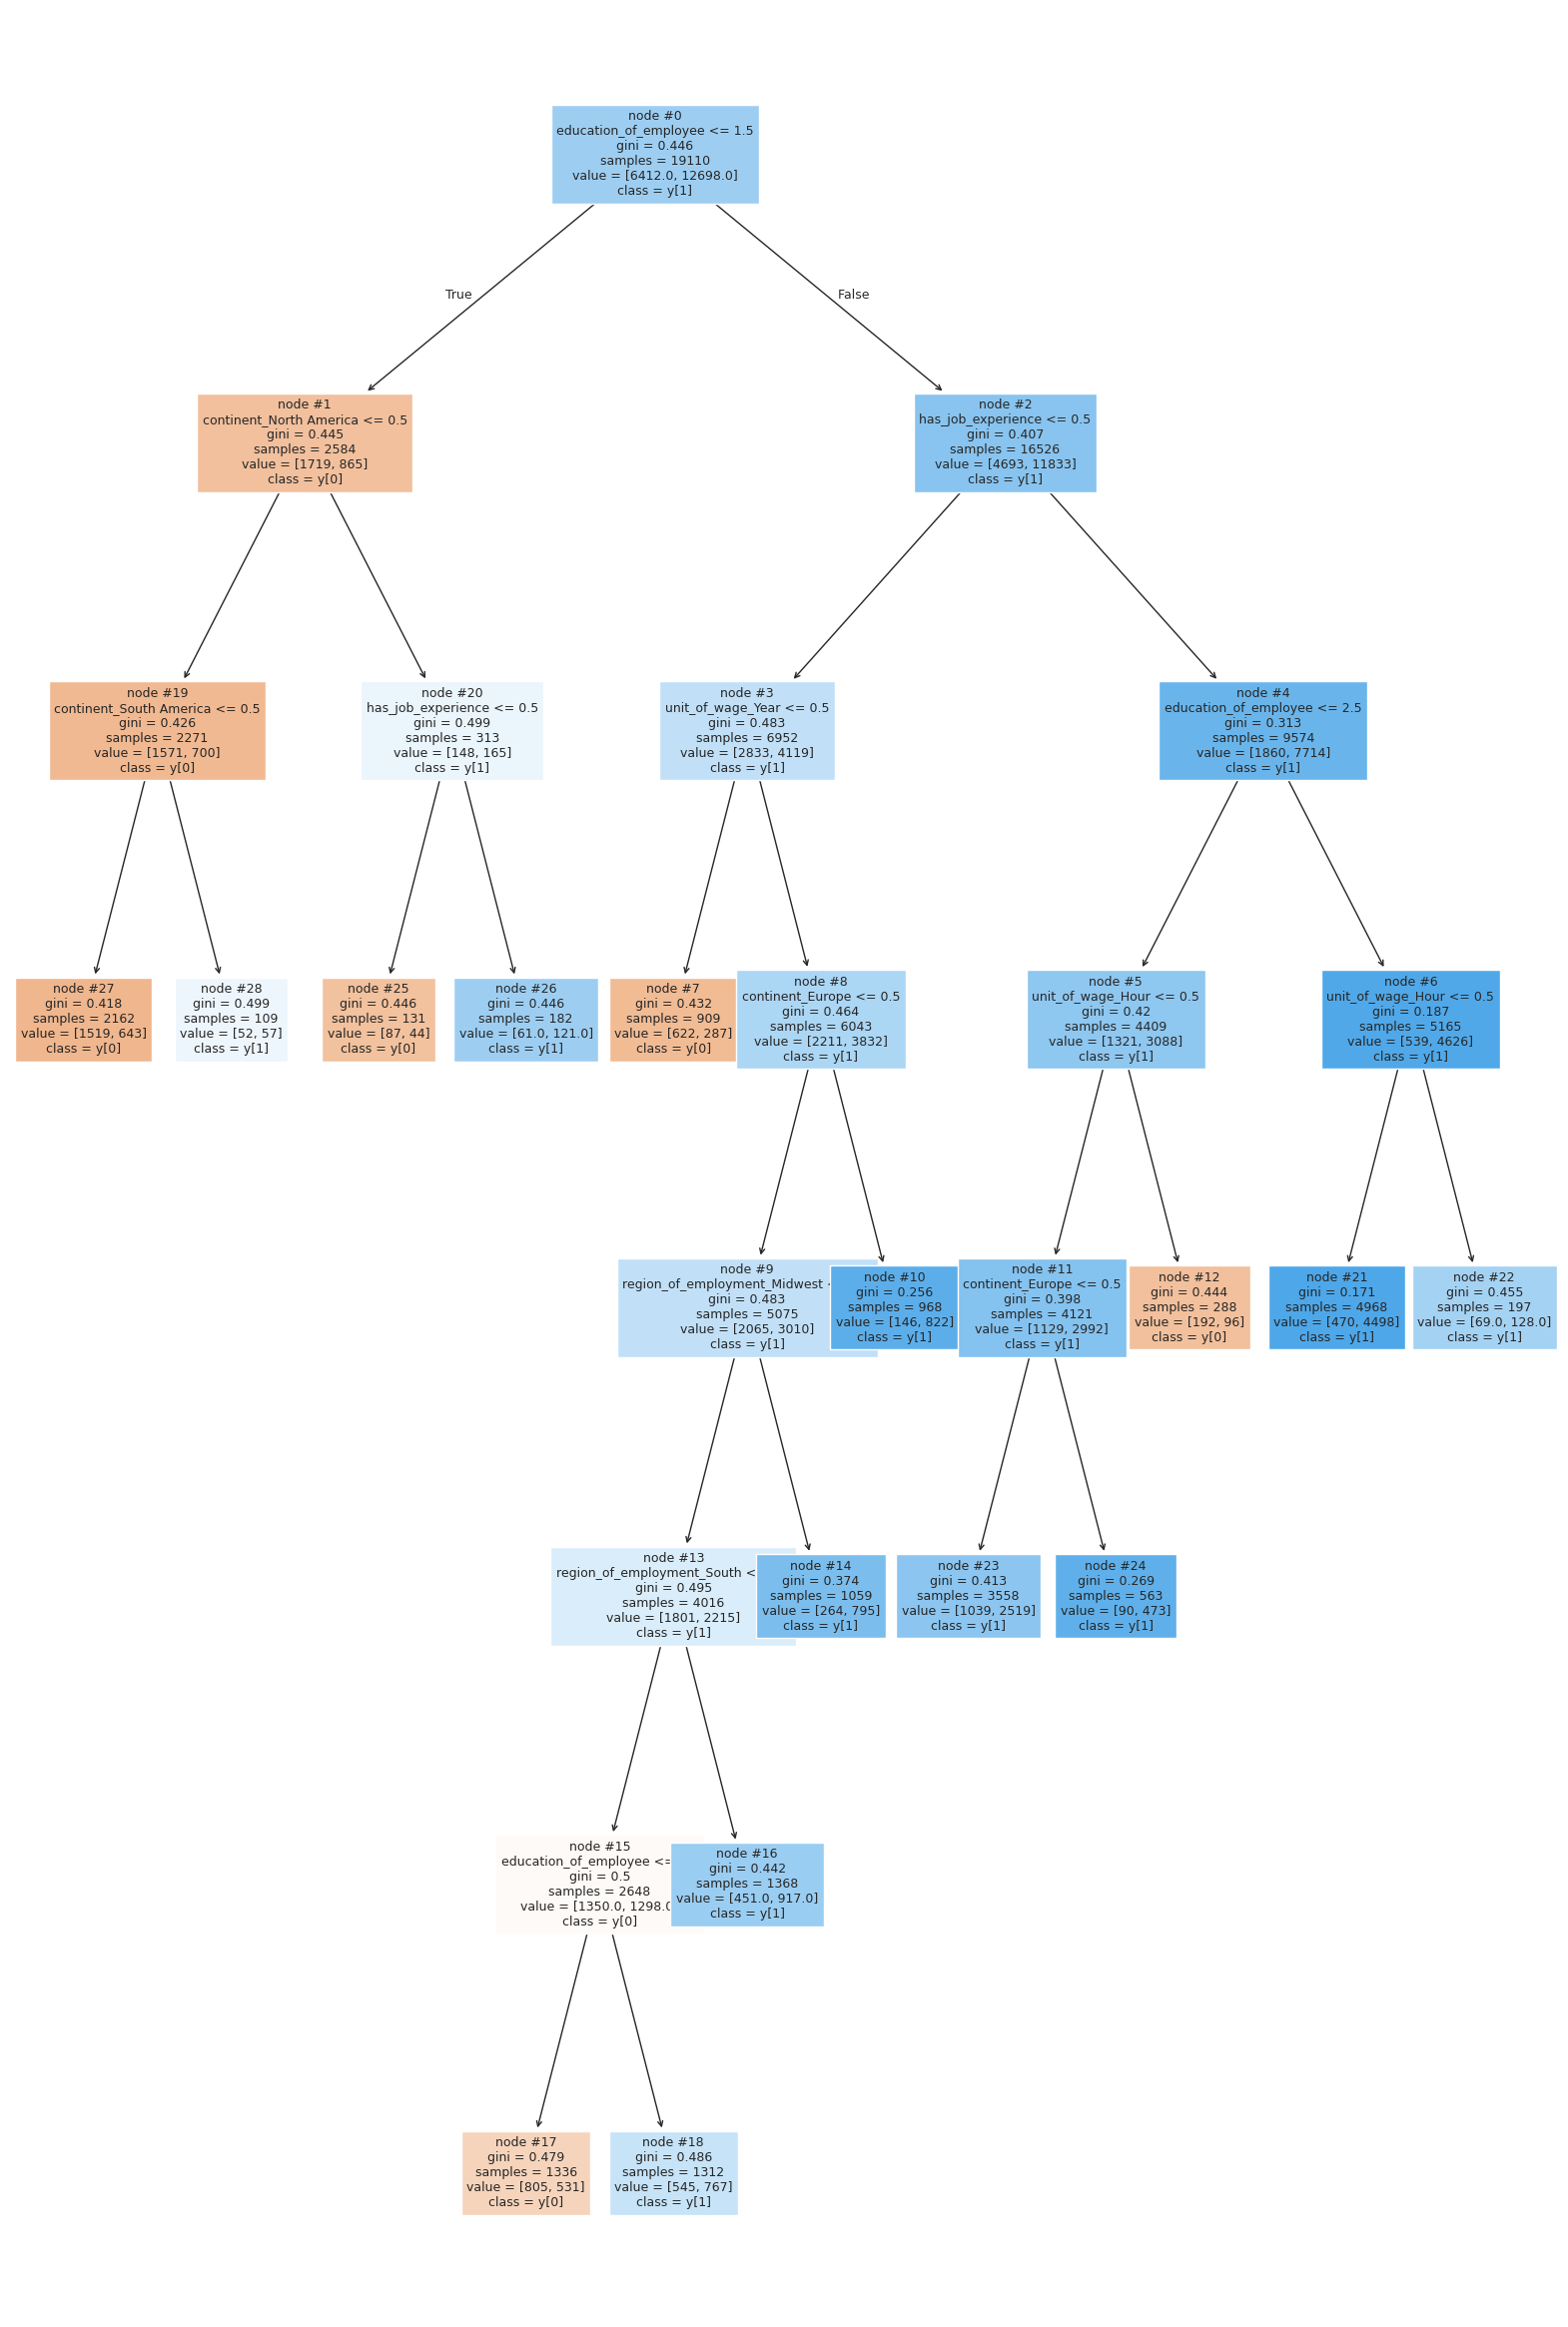

In [ ]:
#Plot the tree
plt.figure(figsize=(20,30))
tree.plot_tree(dt_classifier_tuned,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

Max depth of 7 was ideal for the model. Five and nine were tried. They had lower scores.

### Bagging Classifier

In [ ]:
#Assign the bagging model classifier
bag_classifier = BaggingClassifier(random_state=1)
#Fit the model to the data
bag_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
#Check the performance metrics of bag_classifier
Bag_Train = (model_performance_classification_sklearn(bag_classifier, X_train, y_train))
Bag_Test = (model_performance_classification_sklearn(bag_classifier, X_test, y_test))
print(Bag_Train)
print(Bag_Test)

   Accuracy    Recall  Precision        F1
0  0.984668  0.985903   0.990976  0.988433
   Accuracy    Recall  Precision        F1
0  0.700157  0.778704   0.779064  0.778884


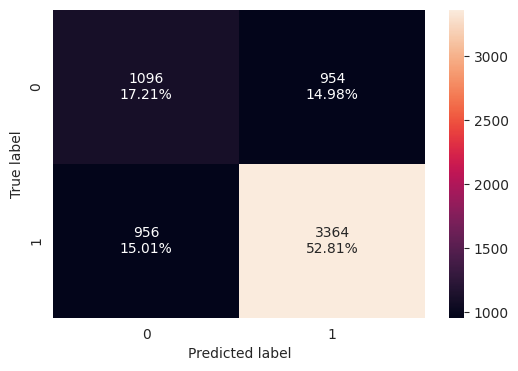

In [ ]:
#Check the performance matrix for bag_classifier
confusion_matrix_sklearn(bag_classifier, X_test, y_test)

The model is overfitting the training data

#### Tune the Bagging Classifier

In [ ]:
#Assign tuned bagging classifier
bag_classifier_tuned = BaggingClassifier(random_state=1)

#Hyperparameter tuning for bagging model
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [10,30,50,70],
}

#assign F1 metric to acc_score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(bag_classifier_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bag_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bag_classifier_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
#check performance metrics for tuned_bagged_classifier
Tuned_Bag_Train = (model_performance_classification_sklearn(bag_classifier_tuned, X_train, y_train))
Tuned_Bag_Test = (model_performance_classification_sklearn(bag_classifier_tuned, X_test, y_test))
print(Tuned_Bag_Train)
print(Tuned_Bag_Test)

   Accuracy    Recall  Precision        F1
0  0.997645  0.999764   0.996703  0.998231
   Accuracy    Recall  Precision        F1
0  0.733752  0.886806   0.760421  0.818765


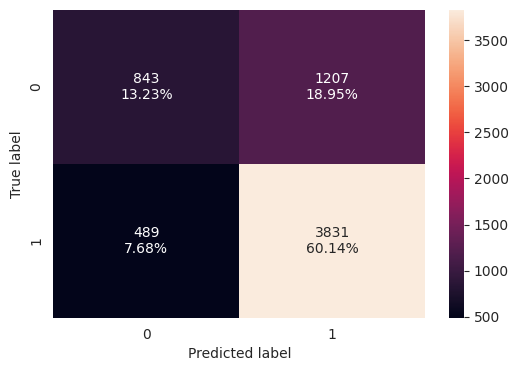

In [ ]:
#Check the confusion matrix for tuned bag classifier
confusion_matrix_sklearn(bag_classifier_tuned, X_test, y_test)

The tuned bag classifier is also overfitting the test data. This is not a usable model.

### Random Forest

In [ ]:
#Assign Random Forest Model
rf_classifier = RandomForestClassifier(random_state=1)
#Fit the model to the data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Check performance metrics of the rf on train and test data
RF_Train = (model_performance_classification_sklearn(rf_classifier, X_train, y_train))
RF_Test = (model_performance_classification_sklearn(rf_classifier, X_test, y_test))
print(RF_Train)
print(RF_Test)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy    Recall  Precision        F1
0  0.726374  0.836111   0.777276  0.805621


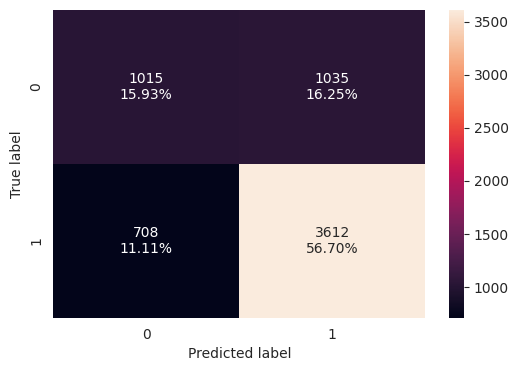

In [ ]:
#Check confusion matrix of rf_classifier
confusion_matrix_sklearn(rf_classifier, X_test, y_test)

The Model is overfitting the training data.

#### Tuning Random Forest

In [ ]:
#assign tuned rf classifier
rf_classifier_tuned = RandomForestClassifier(max_depth = 4, random_state=1)

#Hyperparameter tuning for Random forest
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "min_samples_leaf": np.arange(1, 7),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#assign F1 metric to acc_score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(rf_classifier_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_classifier_tuned = grid_obj.best_estimator_

#fit the rtuned model to the training data
rf_classifier_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_samples=0.5, n_estimators=50,
                       random_state=1)

In [ ]:
#Check performance metrics of the tuned rf classifier
Tuned_RF_Train = (model_performance_classification_sklearn(rf_classifier_tuned, X_train, y_train))
Tuned_RF_Test = (model_performance_classification_sklearn(rf_classifier_tuned, X_test, y_test))
print(Tuned_RF_Train)
print(Tuned_RF_Test)

   Accuracy    Recall  Precision        F1
0  0.706279  0.949441   0.708052  0.811169
   Accuracy    Recall  Precision       F1
0  0.710832  0.949769   0.716306  0.81668


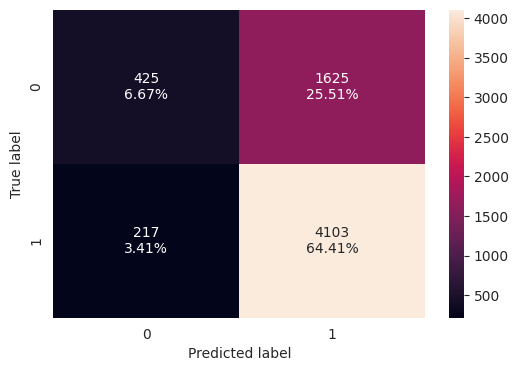

In [ ]:
#Check the confusion matrix for tuned rf
confusion_matrix_sklearn(rf_classifier_tuned, X_test, y_test)

The model fit better on the test than on the training data. The F1 score was 81.7%.

## Boosting

### Gradient Boosting




In [ ]:
#Assign Gradient Booster Classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
#Fit gb_classifier
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=1)

In [ ]:
#Check performance metrics of gb_classifier
Gradient_Train = (model_performance_classification_sklearn(gb_classifier, X_train, y_train))
Gradient_Test = (model_performance_classification_sklearn(gb_classifier, X_test, y_test))
print(Gradient_Train)
print(Gradient_Test)


   Accuracy    Recall  Precision        F1
0  0.755468  0.877697   0.781283  0.826688
   Accuracy    Recall  Precision       F1
0  0.749137  0.869213   0.784252  0.82455


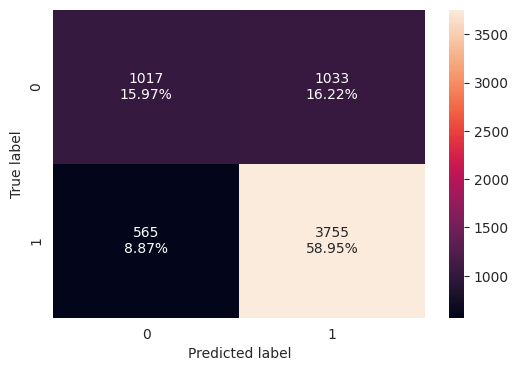

In [ ]:
#Check confusion matrix for gb_classifier
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

The model is not overfitting and the F1 scores are on par with the other well-fitting models, about 82-83%.

#### Tuning gb_classifier

In [ ]:
# Assign the type of classifier.
gb_classifier_tuned = GradientBoostingClassifier(random_state=1)

#Hyperparameter for tuning
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_classifier_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_classifier_tuned.fit(X_train, y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
#Check performance scores of tuned model
Tuned_Gradient_Train = (model_performance_classification_sklearn(gb_classifier_tuned, X_train, y_train))
Tuned_Gradient_Test = (model_performance_classification_sklearn(gb_classifier_tuned, X_test, y_test))
print(Tuned_Gradient_Train)
print(Tuned_Gradient_Test)

   Accuracy    Recall  Precision        F1
0  0.751544  0.877619   0.777235  0.824382
   Accuracy    Recall  Precision       F1
0  0.750392  0.871296   0.784494  0.82562


The F1 score improved slightly with the Hyperparameter tuning.

### Adaboost

In [ ]:
#Assign adaboost classifier
AB_classifier = AdaBoostClassifier(random_state=1)
#fit model to training data
AB_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Check the performance metrics of AB_classifier
AB_Train = (model_performance_classification_sklearn(AB_classifier, X_train, y_train))
AB_Test = (model_performance_classification_sklearn(AB_classifier, X_test, y_test))
print(AB_Train)
print(AB_Test)

   Accuracy    Recall  Precision        F1
0  0.737572  0.887069   0.758774  0.817921
   Accuracy    Recall  Precision        F1
0  0.736735  0.886574   0.763404  0.820392


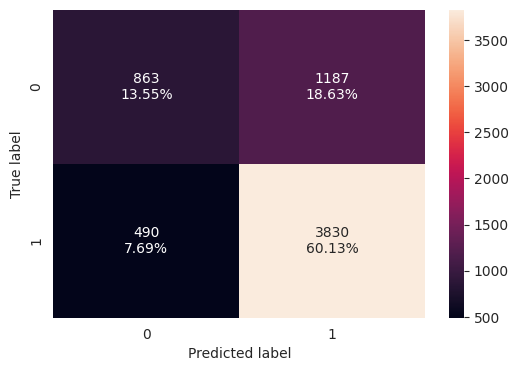

In [ ]:
#Create a confusion matrix for AB_classifier
confusion_matrix_sklearn(AB_classifier, X_test, y_test)

The model is not overfitting and the F1 scores are on par, about 82-83%.

#### Tuning Adaboost Hyperparameter

In [ ]:
#Assign the tuning classifier
AB_classifier_tuned = AdaBoostClassifier(random_state=1)

#Hyperparameter tuning for adaboost model
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05,.001],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Assign the f1 metric to acc score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(AB_classifier_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
AB_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
AB_classifier_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
#Check the performance metrics of AB_classifier tuned on the data
Tuned_AB_Train = (model_performance_classification_sklearn(AB_classifier_tuned, X_train, y_train))
Tuned_AB_Test = (model_performance_classification_sklearn(AB_classifier_tuned, X_test, y_test))
print(Tuned_AB_Train)
print(Tuned_AB_Test)

   Accuracy    Recall  Precision        F1
0  0.752015  0.879824   0.776642  0.825019
   Accuracy    Recall  Precision        F1
0  0.748195  0.872685   0.781509  0.824584


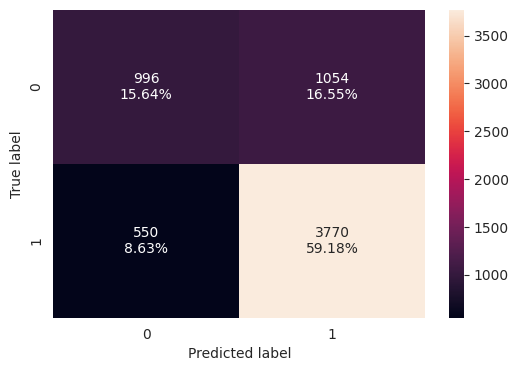

In [ ]:
#Check the confusion matrix for the Tuned_AB
confusion_matrix_sklearn(AB_classifier_tuned, X_test, y_test)

The F1 scores of the tuned model are better than the untuned model and the model is not overfitting. F1 score is about 82-83%.

### XG Boost

In [ ]:
xgb_classifier = XGBClassifier(random_state=1,enable_categorical=True, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Check performance metrics of XG boost
XGB_Train = (model_performance_classification_sklearn(xgb_classifier, X_train, y_train))
XGB_Test = (model_performance_classification_sklearn(xgb_classifier, X_test, y_test))
print(XGB_Train)
print(XGB_Test)

   Accuracy    Recall  Precision        F1
0  0.836682  0.927075   0.842844  0.882955
   Accuracy   Recall  Precision       F1
0  0.731711  0.84838   0.776648  0.81093


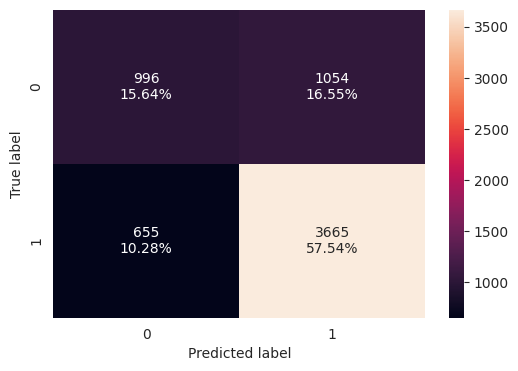

In [ ]:
#Check the confusion matrix for XG boost
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

The model is is overfitting.

#### Tune XG Boost

In [ ]:
#Assign tuning classifier
xgb_classifier_tuned = XGBClassifier(random_state=1, enable_categorical=True, eval_metric="logloss")

#Hyperparameter tuning for XGboost
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#assign f1 metric to acc_score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(xgb_classifier_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_classifier_tuned = grid_obj.best_estimator_

#fit the model to the data
xgb_classifier_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Check the performance metrics of the tuned XG Boost Classifier
Tuned_XGB_Train = (model_performance_classification_sklearn(xgb_classifier_tuned, X_train, y_train))
Tuned_XGB_Test = (model_performance_classification_sklearn(xgb_classifier_tuned, X_test, y_test))
print(Tuned_XGB_Train)
print(Tuned_XGB_Test)

   Accuracy    Recall  Precision        F1
0  0.743851  0.929595   0.746852  0.828264
   Accuracy    Recall  Precision        F1
0  0.743485  0.920602   0.754935  0.829579


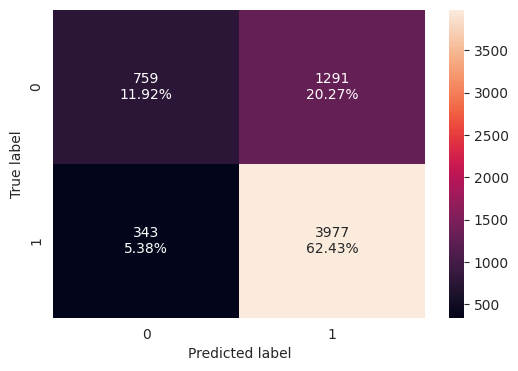

In [ ]:
#Check the confusion matrix of the tuned XGB
confusion_matrix_sklearn(xgb_classifier_tuned, X_test, y_test)

The model is not overfitting and has provided the highest F1 scores

### Stacking Classifier

In [ ]:
#Assign parameters to model_grid variable
model_grid = [
    ("AdaBoost", AB_classifier_tuned),
    ("Gradient Boosting", gb_classifier_tuned),
    ("Decision Tree", dt_classifier_tuned),
    ("Random Forest", rf_classifier_tuned),
]


#Assign the stacking classifier and its parameters
stack_classifier = StackingClassifier(estimators=model_grid, final_estimator=(xgb_classifier_tuned))


#Fit the model to the data
stack_classifier.fit(X_train, y_train)




StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                                    random_state=1),
                                                   learning_rate=0.05,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Decision Tree',
                                Deci...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [ ]:
#Check the performance metrics of the stacking classifier
Stack_Train = (model_performance_classification_sklearn(stack_classifier, X_train, y_train))
Stack_Test = (model_performance_classification_sklearn(stack_classifier, X_test, y_test))
print(Stack_Train)
print(Stack_Test)

   Accuracy    Recall  Precision        F1
0  0.747567  0.905733   0.760246  0.826637
   Accuracy    Recall  Precision        F1
0  0.747567  0.898148   0.768621  0.828352


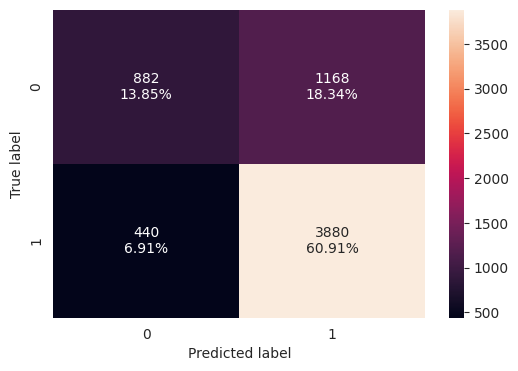

In [ ]:
#Check the performance matrix for the Stacking Classifier
confusion_matrix_sklearn(stack_classifier, X_test, y_test)

The Stacking classifier gave similar F1 scores on par with all other proper-fitting models, about 82-83%.

## Model Performance Comparison and Conclusions

#### Training and Testing F1 Performance Comparison

In [ ]:
# training performance comparison

Compare_Train_df = pd.concat(
    [
        DT_Train.T,
        Tuned_DT_Train.T,
        Bag_Train.T,
        Tuned_Bag_Train.T,
        RF_Train.T,
        Tuned_RF_Train.T,
        AB_Train.T,
        Tuned_AB_Train.T,
        Gradient_Train.T,
        Tuned_Gradient_Train.T,
        XGB_Train.T,
        Tuned_XGB_Train.T,
        Stack_Train.T,
    ],
    axis=1,
)
Compare_Train_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
Compare_Train_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.749451,0.984668,0.997645,1.0,0.706279,0.737572,0.752015,0.755468,0.751544,0.836682,0.743851,0.747567
Recall,1.0,0.873917,0.985903,0.999764,1.0,0.949441,0.887069,0.879824,0.877697,0.877619,0.927075,0.929595,0.905733
Precision,1.0,0.776883,0.990976,0.996703,1.0,0.708052,0.758774,0.776642,0.781283,0.777235,0.842844,0.746852,0.760246
F1,1.0,0.822548,0.988433,0.998231,1.0,0.811169,0.817921,0.825019,0.826688,0.824382,0.882955,0.828264,0.826637


The top three F1 performance metrics on the training data came from the tuned xgb classifier, the stacking classifier, and the tuned adaboost classifier. All F1 scores were about 82-83%

In [ ]:
#Check the testing performance of each model
Compare_Test_df = pd.concat(
    [
        DT_Test.T,
        Tuned_DT_Test.T,
        Bag_Test.T,
        Tuned_Bag_Test.T,
        RF_Test.T,
        Tuned_RF_Test.T,
        AB_Test.T,
        Tuned_AB_Test.T,
        Gradient_Test.T,
        Tuned_Gradient_Test.T,
        XGB_Test.T,
        Tuned_XGB_Test.T,
        Stack_Test.T,
    ],
    axis=1,
)
Compare_Test_df.columns = [
    "Test Decision Tree",
    "Test Tuned Decision Tree",
    "Test Bagging Classifier",
    "Test Tuned Bagging Classifier",
    "Test Random Forest",
    "Test Tuned Random Forest",
    "TestAdaboost Classifier",
    "TestTuned Adaboost Classifier",
    "Test Gradient Boost Classifier",
    "Test Tuned Gradient Boost Classifier",
    "TestXGBoost Classifier",
    "Test XGBoost Classifier Tuned",
    "Test Stacking Classifier",
]
print("Testing performance comparison:")
Compare_Test_df

Testing performance comparison:


,Test Decision Tree,Test Tuned Decision Tree,Test Bagging Classifier,Test Tuned Bagging Classifier,Test Random Forest,Test Tuned Random Forest,TestAdaboost Classifier,TestTuned Adaboost Classifier,Test Gradient Boost Classifier,Test Tuned Gradient Boost Classifier,TestXGBoost Classifier,Test XGBoost Classifier Tuned,Test Stacking Classifier
Accuracy,0.664364,0.749608,0.700157,0.733752,0.726374,0.710832,0.736735,0.748195,0.749137,0.750392,0.731711,0.743485,0.747567
Recall,0.743750,0.868981,0.778704,0.886806,0.836111,0.949769,0.886574,0.872685,0.869213,0.871296,0.848380,0.920602,0.898148
Precision,0.757069,0.784863,0.779064,0.760421,0.777276,0.716306,0.763404,0.781509,0.784252,0.784494,0.776648,0.754935,0.768621
F1,0.750350,0.824783,0.778884,0.818765,0.805621,0.816680,0.820392,0.824584,0.824550,0.825620,0.810930,0.829579,0.828352


The top three F1 performance metrics on test data came from the tuned xgb classifier, the stacking classifier, and the tuned gradient classifier. All F1 scores were about 82-83%

### Importance Features

In [ ]:
#Check The feature importance for each model
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': xgb_classifier_tuned.feature_importances_
})
importances = importances.sort_values(by='Importance')
importances


,Attribute,Importance
23,full_time_position_Y,0.000000
21,requires_job_training_Y,0.000000
18,unit_of_wage_Week,0.007174
17,unit_of_wage_Month,0.007548
3,yr_of_estab,0.007937
2,no_of_employees,0.008145
9,continent_Oceania,0.009896
5,continent_Africa,0.010195
20,requires_job_training_N,0.011220
11,region_of_employment_Island,0.012616


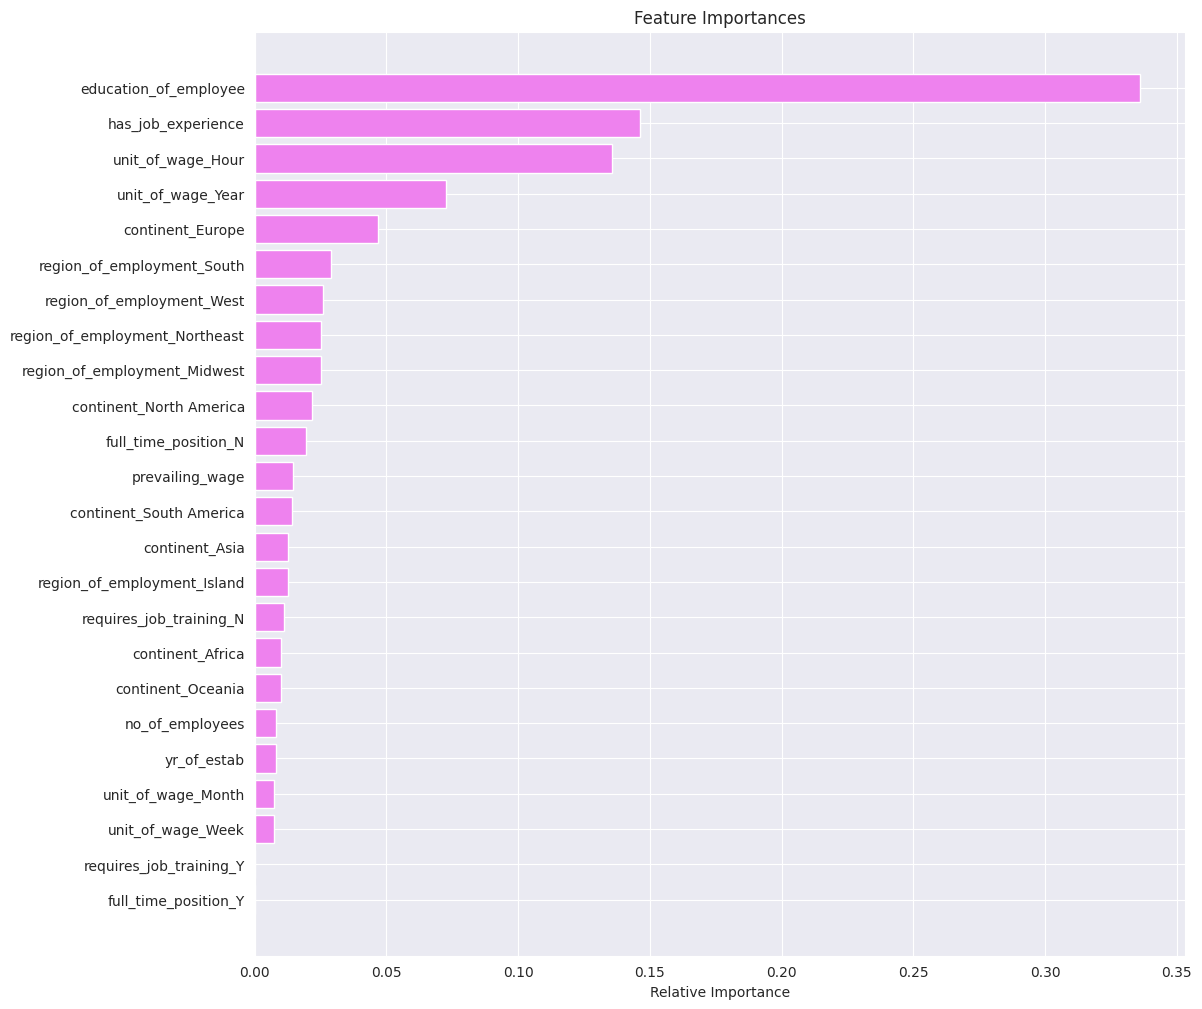

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances['Importance'], color="violet", align="center")
plt.yticks(range(len(importances)), importances['Attribute'])
plt.xlabel("Relative Importance")
plt.show()

The Tuned XG Boost Classifier had education, prior job experience, qnd hourly wage unit as the top three, respectively, importance features. These three features account for about two-thirds of the importance in the model.

In [ ]:
#Check The feature importance for each model
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': gb_classifier_tuned.feature_importances_
})
importances = importances.sort_values(by='Importance')
importances


,Attribute,Importance
5,continent_Africa,0.000000
18,unit_of_wage_Week,0.000138
9,continent_Oceania,0.000363
17,unit_of_wage_Month,0.000452
11,region_of_employment_Island,0.001051
20,requires_job_training_N,0.001416
21,requires_job_training_Y,0.002915
22,full_time_position_N,0.003840
23,full_time_position_Y,0.003852
3,yr_of_estab,0.005632


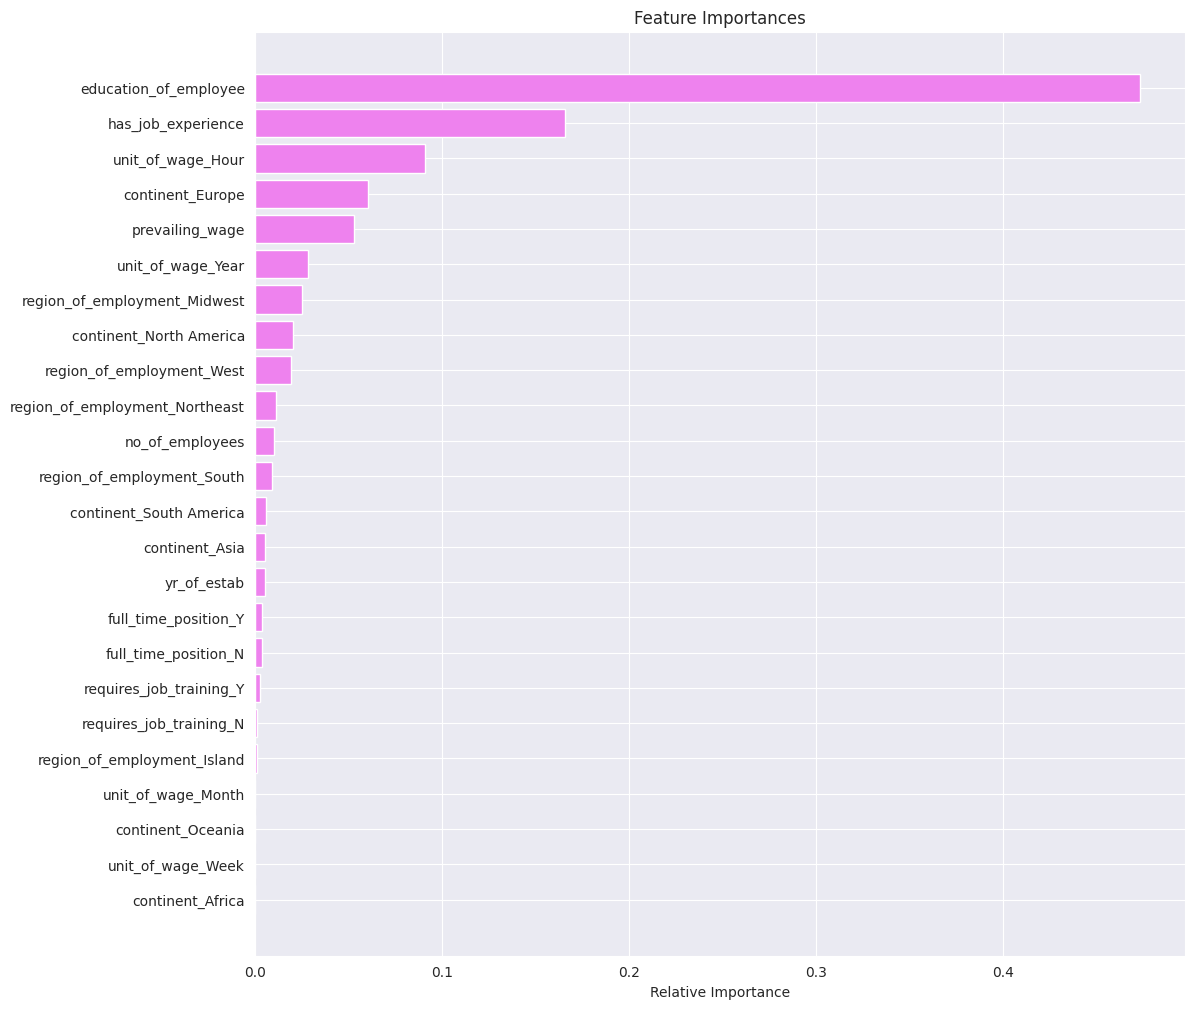

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances['Importance'], color="violet", align="center")
plt.yticks(range(len(importances)), importances['Attribute'])
plt.xlabel("Relative Importance")
plt.show()

The Tuned Gradient Boost Classifier had education, prior job experience, qnd hourly wage unit as the top three, respectively, importance features. These three features account for about three-quarters of the importance in the model.

In [ ]:
#Check The feature importance for each model
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rf_classifier_tuned.feature_importances_
})
importances = importances.sort_values(by='Importance')
importances


,Attribute,Importance
9,continent_Oceania,0.000282
5,continent_Africa,0.000539
17,unit_of_wage_Month,0.000705
22,full_time_position_N,0.001080
20,requires_job_training_N,0.001177
23,full_time_position_Y,0.001278
11,region_of_employment_Island,0.001315
18,unit_of_wage_Week,0.001726
21,requires_job_training_Y,0.001734
10,continent_South America,0.002818


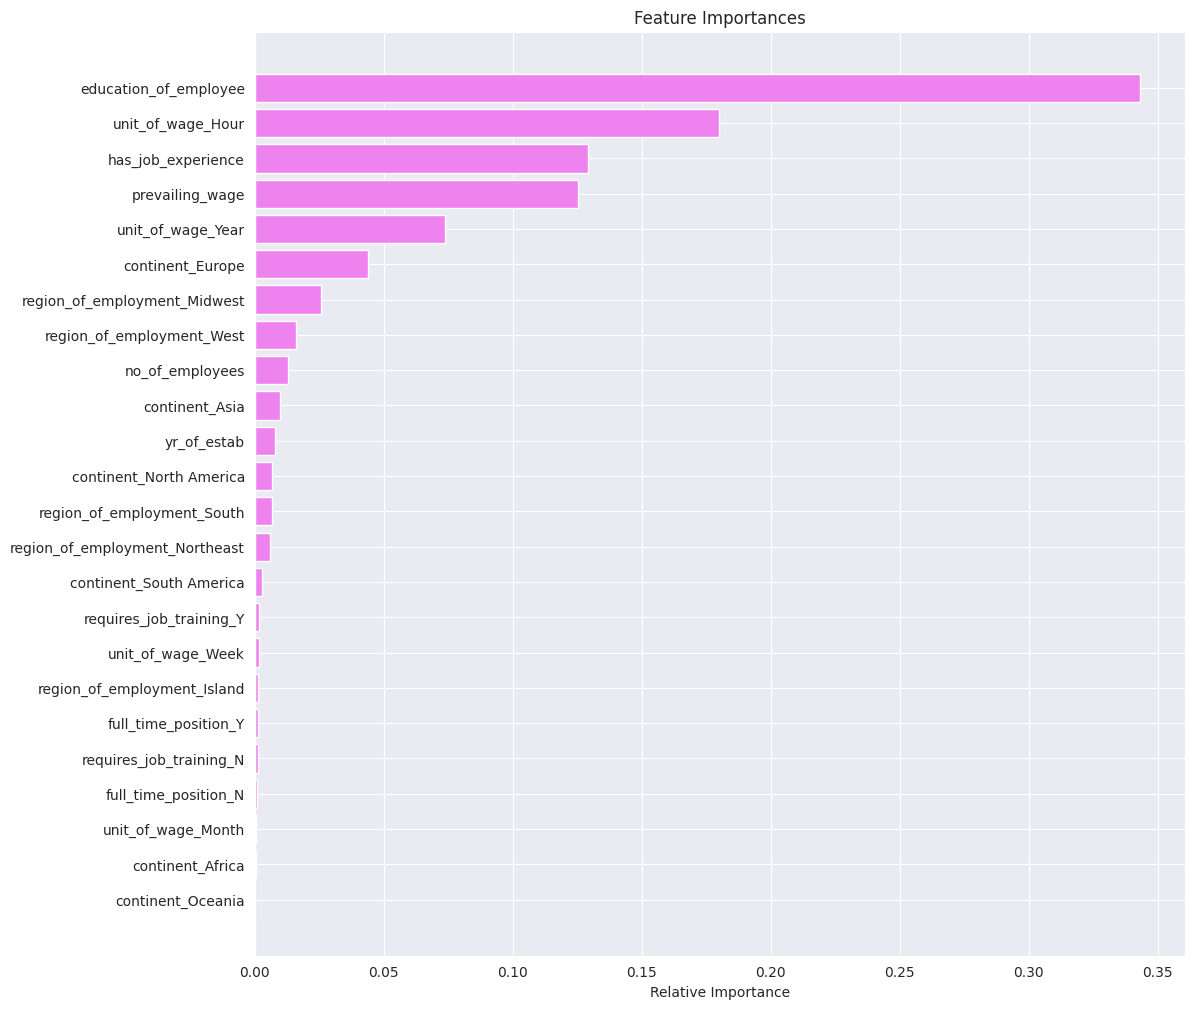

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances['Importance'], color="violet", align="center")
plt.yticks(range(len(importances)), importances['Attribute'])
plt.xlabel("Relative Importance")
plt.show()

The Tuned Random Forest Classifier had education, hourly wage unit, and prior job experience as the top three, respectively, importance features. While the top three are the same for the other two visualized models, Job experience is third instead of second. These three features account for two-thirds of the importance in the model.

## Actionable Insights and Recommendations

**Insights**

*   The Tuned XG Boost model provided the highest F1 score of 83%. The runner up was the Stacking Classifier model (82.8%), followed by the Tuned Gradient Classifier (82.6%).

*   The most important feature was education of employee, going as high as 47% in the Tuned Gradient Boost Model. The Tuned XGBoost and Random forest classifiers hovered between 30-35%.

*   Job Experience and Unit of Wage - Hour competed for second most important feature: Job experience was found to be second most important in the Tuned Gradient and Tuned XG Boost Models (15-17%), while Unit of Wage - Hour was second for the Random Forest (18%).

*   The top three importance features were consistent across the Tuned XGBoost, Tuned Gradient Boost, and Random Forest Models.

*   Unit of Wage - Hour was negatively correlated with Case Status (Having Unit of wage = hourly had more visa denials).

*   Job Experience and Education of Employee were both positively correlated with Case Status (Experience + Better education had less Visa Denials).

**Recommendations**

*   The Office of Foreign Labor Certification (OFLC) should first look into unit of wage and prevailing wage standardization. Everything should be converted into hourly (or the most minimum) unit of wage. Converting to annual unit is not recommended because it is unknown if the hourly workers work as much as the annual workers.

*   The OFLC should do more research on job experience, including length of experience, industry, and quality. Yes or no for Job experience does not give a good picture.

*   More research should be done into the actual costs associated for businesses on wrongly approving or wrongly denying candidates. What are the costs for sponsoring an unqualified worker? What are costs of overlooking a qualified worker?

*   Until more research is performed on wage standaridization, prior job experience, and associated business costs, I do not believe the model is ready to be deployed. Since these factors weight so heavily on model decision, it would be irresponsible to use it without the research.

*   The OFLC can, however, use a predictive model for a pre-screen process that declines applicants who have no prior job experience and no prior education. However, there is no data on no prior education in this dataset, so that might need to be conducted as well.
